# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2020/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 29th, 2020 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: SRJCH2.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

# Answers for Part 1

## 1. Binning real numbers

> **1.1 Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with  𝜇=2  and  𝜎=0.125 .**

In [41]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [42]:
# set random seed
np.random.seed(929)

mu, sigma, N = 2.0, 0.125, 5000
gaussian = np.random.normal(mu, sigma, N)

# to verify that the generated data is Gaussian distributed with 𝜇=2 and 𝜎=0.125
print('The mean value of generated 5000 samples: {}'.format(np.mean(gaussian)))
print('The standard deviation of generated 5000 samples: {}'.format(np.std(gaussian)))

The mean value of generated 5000 samples: 1.998987028479685
The standard deviation of generated 5000 samples: 0.12526507501382267


> **1.2 Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?**

In [43]:
# use numpy.histogram to bin those number into 10 bins
hist, bin_edges = np.histogram(gaussian, bins = 10)

# check the return of numpy.histogram function
print('hist:\t\t{}\nbin_edges:\t{}\n'.format(hist, bin_edges))

# calculate the length for both arrays
print('length of hist:{}, length of bin_edges:{}'.format(len(hist),len(bin_edges)))

hist:		[   5   47  215  660 1249 1428  916  380   86   14]
bin_edges:	[1.51751749 1.60990671 1.70229592 1.79468513 1.88707435 1.97946356
 2.07185277 2.16424199 2.2566312  2.34902041 2.44140963]

length of hist:10, length of bin_edges:11


**Answer:<br>numpy.histogram returns two arrays.
The number of occurrences in each bin are included in first array while the boundary values of each bin are shown in the second array.
The two arrays are of unequal length. The first array contains 10 values while the second one contains 11 values.
This is because 11 values are needed to specify the boundary of each bin(10 bins are included here).**

>**1.3 Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

In [44]:
width = bin_edges[1] - bin_edges[0] #specify the equal size of each bin

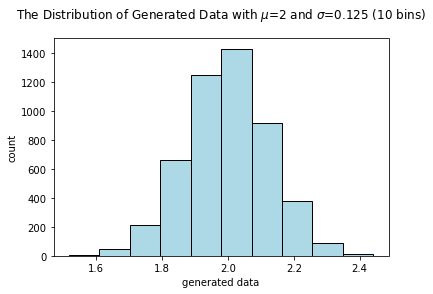

In [45]:
plt.bar(bin_edges[:-1],hist, align='edge', width=width,edgecolor ='black',color = 'lightblue')
plt.xlabel('generated data') 
plt.ylabel('count')
plt.title('The Distribution of Generated Data with $\mu$=2 and $\sigma$=0.125 (10 bins)',pad = 20.0)
plt.show()


**Answer:** 

**<br>The length of these two arrays are not equal while the boundary array has 11 values, but the count is only 10. This is because 11 values are needed to specify the boundary of each bin(10 bins are included here).**
**<br>To solve the problem:**      
**1. The last item is removed from the bin-array and the width of each bin is specified equally.**  
**2. plt.bar is used instead of plt.hist, since plt.hist only accepts data as first argument, instead of binned counts(number).**  
**3. As the bin_edges is the boundary of bins, set the *align* as 'edge' so that it would align the left edges of the bars with the x positions.**  
**The figure above is the distribution of generated data with \mu = 2.0 and \sigma = 0.125, which is drawing using the method above.**

## 2. Binning integers

>**2.1 But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by  𝜆=10 . Find the maximum and minimum value of your 5000 random numbers.**

In [46]:
np.random.seed(2020)
lam,N = 10,5000
poisson = np.random.poisson(lam, N) # generate 5000 numbers drawn from a Poisson distribution characterized by 𝜆=10
max_p, min_p = max(poisson),min(poisson)

print('The max value:{}\t\nThe min value:{}'.format(max_p,min_p))

The max value:25	
The min value:1


>**2.2 Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector  𝑣  that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how numpy.histogram deals with the smallest an largest value in particular; is it correct to set the first entry of  𝑣  to be equal to the smallest value you observe and the last entry of  𝑣  to be the highest value observed?). <br>Use the vector by setting numpy.histogram's bin parameter as bin =  𝑣 . What is the sum over bin counts? <br>Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**

In [47]:
# if the bins is [1,2,3,4], the np.histogram returns values in [1,2), [2,3) and [3,4]. 
# therefore, we should set the bins to [min_p, min_p +1), ......, [max_p, max_p +1]. which require the bins to be: [min_p, ... , max_p + 1]
# notice that, if we set the bins to be [min_p, ... , max_p], the last bin would be [max_p - 1, max_p] so the 2 interger will count in the same bin.
# Also, it should be considered that, for np.arange(a,b), it returns [a,a+1, .. ,b-1]

v = np.arange(1,max_p+2) 

hist, bin_edges = np.histogram(poisson, bins = v)

print('The sum over bin counts: {}.'.format(sum(hist)))

The sum over bin counts: 5000.


**Answer:**
> How to create the vector 𝑣; is it correct to set the first entry of 𝑣 to be equal to the smallest value you observe and the last entry of 𝑣 to be the highest value observed?).

**According to the np.histogram, if the *bins* are set as $[1,2,3,4]$, the np.histogram returns values in $[1,2), [2,3) and [3,4]$. Therefore, we should set the bins as $[min_p, min_p +1), ......, [max_p, max_p +1]$, which require the parameter *bins* to be: $[min_p, ... , max_p + 1]$. Notice that, if we set the bins as $[min_p, ... , max_p]$, the last bin would be $[max_p - 1, max_p]$, so the last two integers will be counted in the same bin, which doesn't meet the requirement.**

> What is the sum over bin counts?

**The sum over bin counts is 5000.<br>If we set the bins correctly, the sum of bin counts should be equal to the sample size of generated data.**

> Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

**The first element of the binning-vector should be the min value of Poisson distribution. And the last element of binning-vector should be $max_p + 1$ of Poisson distribution, according to the meaning of parameter $bins$ in np.historgram.<br> When the $bins$ is set to $[min_p, map_p+1]$, np.histogram will generate the bins as: $[min_p, min_p+1]), [min_p+1, min_p+2),... [max_p,max_p+1]$, each bin counts the number of integers range from $min_p$ to $max_p$.**

>**2.3 Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution**

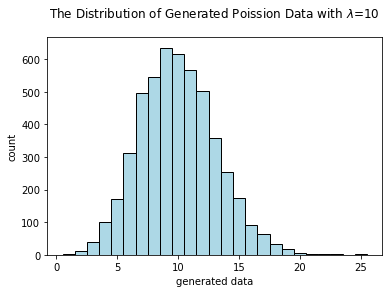

In [48]:
width = 1.0
plt.bar(bin_edges[:-1], hist, align='center', width=width,edgecolor ='black',color = 'lightblue')

plt.xlabel('generated data') 
plt.ylabel('count')
plt.title('The Distribution of Generated Poission Data with $\lambda$=10',pad = 20.0)
plt.show()

**Answer:**<br>
**In this figure, we plot the bar with $align='center'$ because for Possion distribution, all the samples are intergers, thus align the bar in the center would make more sence than egdes(although it is also correct).**


## 3. Binning and plotting degree distributions

>**3.1 Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that N=5000, but how do you find p?<br>Hint: The parameter  𝜆  in the Poisson distribution corresponds to the average degree, so you have to find a  𝑝  that results in an average degree,  𝑘=10 . And you know that  ⟨𝑘⟩=𝑝(𝑁−1) , which will give you  𝑝 .**

In [49]:
#find P
lam, N = 10, 5000
k_hat = lam
# ⟨𝑘⟩=𝑝(𝑁−1)
p = k_hat / (N-1)

print('p = <k>/(N-1) = {}'.format(p))

p = <k>/(N-1) = 0.002000400080016003


>**3.2 Now, use networkx to create the graph and extract the degree distribution.**

In [50]:
ER_graph = nx.erdos_renyi_graph(N, p, seed = 0, directed=False)

>**3.3 Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

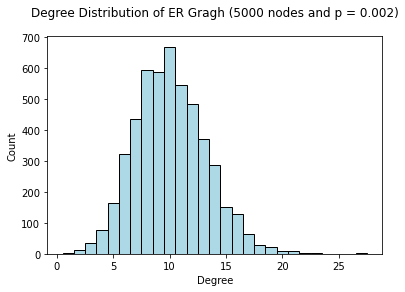

In [52]:
import collections
degrees = [d for n, d in ER_graph.degree()]
degreeCount = collections.Counter(degrees)
degree, count = zip(*degreeCount.items())

# plot
width = 1.0
plt.bar(degree, count, align='center', width=width,edgecolor ='black',color = 'lightblue')
plt.title("Degree Distribution of ER Gragh (5000 nodes and p = 0.002)",pad = 20.0)
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

**This Figure shows the degree distribution of the generated ER Gragh with 5000 nodes and p = 0.002. It is quite similar with the Poisson distribution we plotted above.**

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

# Answers for part 2

## 1. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

>**Erdős-Rényi Networks<br>Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10^(-3).**

**1.1 What is the expected number of links, $<L>$ ?**

In [55]:
# construct the network
p,N = 0.001,3000
ER_graph = nx.erdos_renyi_graph(N, p, seed=2020, directed=False)
expected_L = p*N*(N-1)/2
print('The expected number of links <L> is {}'.format(expected_L))

The expected number of links <L> is 4498.5


**1.2 In which regime is the network?**

In [56]:
import math
expected_k = p*(N-1)

if expected_k < 1:
    regime = 'Subcritical'
elif expected_k == 1:
    regime = 'Critical'
elif expected_k < math.log(N) :
    regime = 'Supercritical'
else:
    regime = 'Connected'

print('expected_k:{}. This network belongs to {} regime.'.format(expected_k,regime))

expected_k:2.999. This network belongs to Supercritical regime.


**1.3 Calculate the probability pc so that the network is at the critical point**

In [57]:
p_c = 1/(N-1)
print('pc represnets the p at critical point. pc = {}.'.format(p_c))

pc represnets the p at critical point. pc = 0.00033344448149383126.


**1.4 Given the linking probability p = 10^(-3), calculate the number of nodes Ncr so that the network has only one component.**
<br>According to text book *Network Science*, the following condition should be satisfied in order for the network to have only one component:
$$‹k›\; > lnN$$

As, $‹k› = p\times(N-1)$, so, the task is to solve the following inequality:
$$p\times(N-1) > lnN$$
use fsolve function from scipy.optimize:

In [92]:
from scipy.optimize import fsolve 
import math

p = 0.001
def f1(x):
    return x-1-(1/p)*math.log(x,math.e)
   
N_cr = math.ceil(fsolve(func = f1,x0 = 8000))  # the node should be a positive integer
print('The minimum N_cr is {}.'.format(N_cr))

The minimum N_cr is 9120.


**1.5 For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.**

In [63]:
k_cr = p*(N_cr -1)
d = math.log(N_cr,math.e)/math.log(k_cr, math.e)
print('<k_cr> = {}, <d> = {:.4f}.'.format(k_cr,d))

<k_cr> = 9.119, <d> = 4.1252.


**Answer:<br>In 1.4, the N_cr is not a fixed number but an integer greater or equal to 9120. Hence, we chose the network with the minimum N_cr 9120 and calculate the k_cr. Also, $<d>$ here is not the exact distance but the estimated one. Since this network has only one component, we could definitely consider it as a small-world network, and for the small-world network, the average distance is approximately $\frac{ln(N)}{ln<k>}$.**

**1.6 Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).**

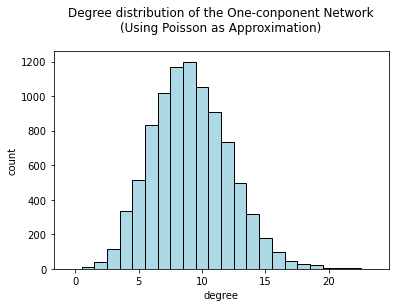

In [64]:
lam, N = k_cr,N_cr
np.random.seed(2020)
s = np.random.poisson(lam, N)
v = np.arange(min(s),max(s)+2)

hist, bin_edges = np.histogram(s,v)
import matplotlib.pyplot as plt
plt.bar(bin_edges[:-1],hist, align='center', width = 1.0,edgecolor ='black',color = 'lightblue')
plt.title('Degree distribution of the One-conponent Network\n(Using Poisson as Approximation)',pad = 20.0)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

**This plot shows the degree distribution pk of this network, noticed that here we use the Poisson degree distribution to estimate.**

## 2. Paths

>**2.1 Plot a random network with 200 nodes and an average degree of 1.5. 
<br>(I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).**

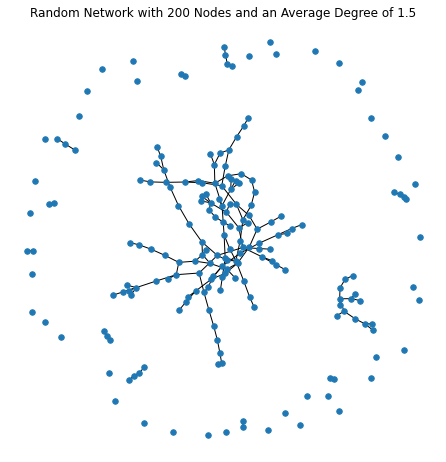

In [96]:
N, k  = 200,1.5
p = k/(N-1)
Graph = nx.erdos_renyi_graph(N, p, seed = 2020,directed=False)
plt.figure(figsize=(6,6))
nx.draw(Graph, node_size =30 , with_labels = False)
plt.title('Random Network with 200 Nodes and an Average Degree of 1.5')
plt.show()

>**2.2 Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)**

In [66]:
# choose the max from the connected components
GCC = max(nx.connected_components(Graph), key=len)
# generate the subgraph
subgraph_GCC = Graph.subgraph(GCC)
print('The GCC of the graph contains {} nodes and {} links.'.format(len(subgraph_GCC.nodes), len(subgraph_GCC.edges)))

The GCC of the graph contains 117 nodes and 125 links.


>**2.3 Choose a node at random from the GCC. (Hint: You may want to try random.choice.)**

In [67]:
import random
random.seed(2020)
random_node = random.choice(list(subgraph_GCC.nodes()))
print('The serial number of randomly choosed node: {}'.format(random_node)) #todo add the serial number to origin

The serial number of randomly choosed node: 139


>**2.4 Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)**

In [68]:
node_step = nx.single_source_shortest_path_length(subgraph_GCC, random_node)
node_two_steps = [node for node in node_step.keys() if node_step[node] == 2]
print('The node that are precisely 2 steps away from {}: {}'.format(random_node, node_two_steps))

The node that are precisely 2 steps away from 139: [66, 140, 174, 112, 63, 29, 127]


>**2.5 Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.**

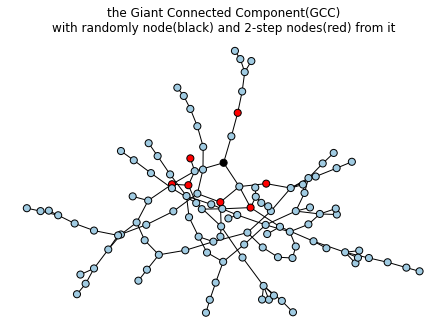

In [102]:
# color each node with color_map
color_map = []
for node in list(subgraph_GCC.nodes()):
    if node == random_node:
        color_map.append("#000000")
    elif node in node_two_steps:
        color_map.append("#ff0000")
    else:
        color_map.append("#A0CBE2")
        
nx.draw(subgraph_GCC, node_size=50, node_color=color_map,edgecolors='black',edge_color='black')
plt.title('the Giant Connected Component(GCC)\nwith randomly node(black) and 2-step nodes(red) from it')
plt.show()

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

# Answers for Part 3

>**1. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  𝑝=0,0.1,and1 . Calculate the average shortest path length  ⟨𝑑⟩  for each one. Describe what happens to the network when  𝑝=1 .**

In [70]:
import networkx as nx
node, k = 500,4
p = [0, 0.1, 1]
Gs = [nx.watts_strogatz_graph(node,k,pp) for pp in p]

# Calculate the average shortest path length ⟨d⟩ for each one
for index,G in enumerate(Gs):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print('With p = {:.2f}, the average shortest path is {:.4f}.'.format(p[index],avg_shortest_path))

With p = 0.00, the average shortest path is 62.8758.
With p = 0.10, the average shortest path is 7.5076.
With p = 1.00, the average shortest path is 4.7545.


**Answer:**<br>
> Describe what happens to the network when 𝑝=1 .

**In the WS model, there are 3 parameters:** 
- N: the number of the nodes
- k: mean degree (which should be an even interger)
- p: the probability of rewiring  

**The algorithms for WS model is:**
1. Construct a regular ring lattice, a graph with N nodes each connected to K neighbors, K/2 on each side.
2. Rewire the link with probability p for each link
  
**Therefore, the WS model could have the properties of high clustering coefficient(come with the *regular ring lattice*) and short average path length(come with the rewiring).<br>When p = 1, it means that every link would be rewired, thus the average shortest path would be decreased and the clustering coefficient would also be decreased.**

>**2. Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).**

In [71]:
import numpy as np
N,k = 500,4
ps = [0,0.01,0.03,0.05,0.1,0.2]
network_number = 50
d_avg,d_std = [],[]
for p in ps:
    d = []
    for i in range(network_number):
        G = nx.watts_strogatz_graph(N,k,p)
        d.append(nx.average_shortest_path_length(G))
    d_avg.append(np.mean(d))
    d_std.append(np.std(d))
    print('p = {:.2f}\tavg distance = {:.4f}\tstd distance = {:.4f}'.format(p,np.mean(d),np.std(d)))

p = 0.00	avg distance = 62.8758	std distance = 0.0000
p = 0.01	avg distance = 23.7701	std distance = 5.5743
p = 0.03	avg distance = 13.1844	std distance = 1.2085
p = 0.05	avg distance = 10.2117	std distance = 0.6868
p = 0.10	avg distance = 7.6700	std distance = 0.3171
p = 0.20	avg distance = 6.1035	std distance = 0.1161


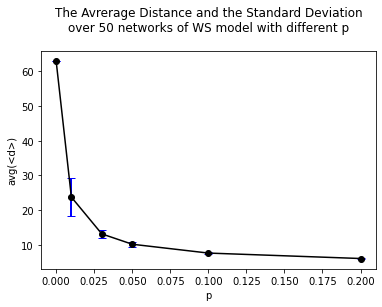

In [73]:
import matplotlib.pyplot as plt
plt.errorbar(ps,d_avg,yerr=d_std,fmt='ko-',ecolor='blue',elinewidth=2,capsize=4)
plt.xlabel('p')
plt.ylabel('avg(<d>)')
plt.title('The Avrerage Distance and the Standard Deviation\nover 50 networks of WS model with different p',pad = 20.0)
plt.show()

**The above plot shows that with the increasing of p, the average distance of networks of WS model decreases. Except the situation that p equals to 0, the standard deviation of distance also decreases.**

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

>**1. Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**

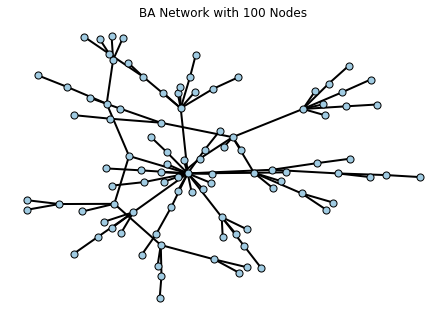

In [104]:
# initialize the first two nodes and the first link
G_BA = nx.Graph()
G_BA.add_edge(1,2)


# define the function 'flat': flatten a list of tuples
flat = lambda a: [item for tuples in a for item in tuples]

# add nodes to 100
for i in range(3, 101): # total number of nodes: 100
    edges = list(G_BA.edges)
    flatten = flat(edges)
    node = random.choice(flatten)
    G_BA.add_edge(node, i)

# Plot the network. 
nx.draw(G_BA, edge_color='black',node_size=50,width=2.0,node_color="#A0CBE2",edgecolors='black')
plt.title('BA Network with 100 Nodes')
plt.show()

>**2. Now create a 5000 node network.**

In [74]:
for i in range(101, 5001): # total number of nodes: 5000
    edges = list(G_BA.edges)
    flatten = flat(edges)
    node = random.choice(flatten)
    G_BA.add_edge(node, i)

>**2.1 What's the maximum and minimum degree?**

In [75]:
degrees = [d for n, d in G_BA.degree()]
dmax = max(degrees)
dmin = min(degrees)
print('The maximum degree is {}, while the minimum degree is {}'.format(dmax, dmin))

The maximum degree is 126, while the minimum degree is 1


>**2.2 Now, bin the degree distribution, for example using numpy.histogram**

In [76]:
import numpy as np
v = np.arange(dmin,dmax+2) # for the reason why here is '+2', please refer the 2.2 in part 1
count,hist = np.histogram(degrees,bins=v) 
hist = hist[0:-1] # del the last element

>**2.3 Plot the distribution. Plot it with both linear and log-log axes.**

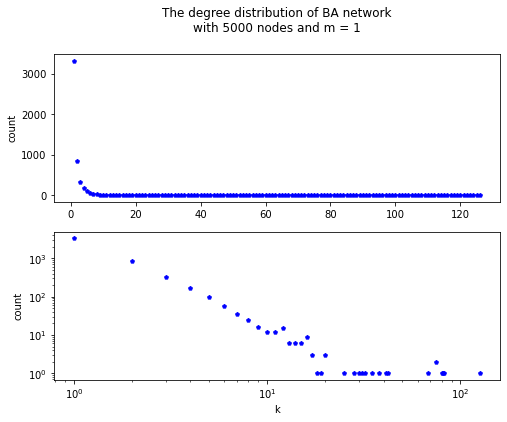

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

ax1 = plt.subplot(211)
ax1.plot(hist,count,'p',color = 'blue',markersize=4)
ax1.set_ylabel('count')

ax2 = plt.subplot(212)
ax2.loglog(hist,count,'p',color = 'blue',markersize=4)
ax2.set_ylabel('count')
ax2.set_xlabel('k')

plt.title('The degree distribution of BA network\nwith 5000 nodes and m = 1',pad = 200.0)
plt.show()

**The plot above shows the degree distribution of BA network with 5000 nodes. It could be observed that the count and the k have the linear relationship in log-log plot.**

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

# Answer for part 5

>**1. Pick a node i at random (e.g. use random.choice). Find its degree.**

In [81]:
import random
random.seed(2021)

#pick a node i at random
random_node_i = random.choice(list(G_BA.nodes))
r_degree = G_BA.degree(random_node_i)
print('Ramdomly choose a node: {}, it\'s degree is {}.'.format(random_node_i,r_degree))

Ramdomly choose a node: 3312, it's degree is 1.


>**2. Find i's neighbors. And calculate their average degree.**

In [82]:
# Find i's neighbors
neighbors = list(G_BA.neighbors(random_node_i))
print('Node {}\'s neighbors are {}'.format(random_node_i,neighbors))

# And calculate their average degree.
degrees = []
for n in neighbors:
    degrees.append(G_BA.degree(n))

import numpy as np
avg_degree = np.mean(degrees)
print('The average degree of node {}\'s neighbors is {}'.format(random_node_i,avg_degree))

Node 3312's neighbors are [20]
The average degree of node 3312's neighbors is 81.0


>**3. Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.**

In [83]:
if avg_degree > r_degree:
    print('True. The aveage degree of {}\'s friends is more then {}\'s.'.format(random_node_i,random_node_i))
else:
    print('False. The aveage degree of {}\'s friends is less or equal then {}\'s.'.format(random_node_i,random_node_i))

True. The aveage degree of 3312's friends is more then 3312's.


>**4. Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

In [84]:
#define a function to check the friendship paradox
def friendship_paradox_check(Graph,times):
    counter = 0
    for i in range(times):
        random_node = random.choice(list(Graph.nodes))
        random_node_degree = Graph.degree[random_node]
        average_neighbor_degree = nx.average_neighbor_degree(Graph, nodes=[random_node])[random_node]
        if average_neighbor_degree > random_node_degree:
            counter += 1
    return counter

In [85]:
trials = 1000
cnt =  friendship_paradox_check(G_BA, trials)
print('The friendship paradox is true in {} of out {} trails.'.format(cnt,trials))

The friendship paradox is true in 854 of out 1000 trails.


 >**5. Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.<br>Compare to the ER network of same size and same  𝑝 . What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.**

In [86]:
import networkx as nx
import random

# build a network of same size and degree, using the growth mechanism without the preferential attachment

N = 5000

G_without_pa = nx.Graph()
G_without_pa.add_nodes_from([1,2])
G_without_pa.add_edge(1,2)

for i in range(3,N+1):
    choose_node = random.choice(list(G_without_pa.nodes())) # randomly choose the node to connect; without preference
    node_number = i
    G_without_pa.add_node(node_number)
    G_without_pa.add_edge(node_number,choose_node)

number_edges = len(G_without_pa.edges())
p = number_edges/(N*(N-1))
print('The p of network using the growth mechanism without the preferential attachment: {}'.format(p))

The p of network using the growth mechanism without the preferential attachment: 0.0002


In [87]:
# bulid ER network with the same size and same p
G_ER = nx.erdos_renyi_graph(N, p,seed = 2020)

G_without_pa: d_max=11, d_min=1
G_ER: d_max=6, d_min=0


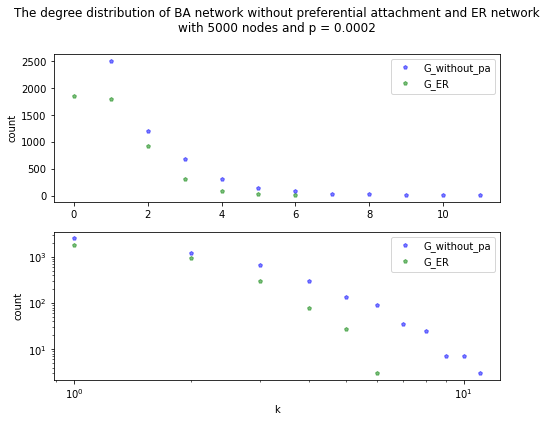

In [88]:
# degree distribution
Gs = {'G_without_pa': G_without_pa,'G_ER':G_ER}
color = ['blue','green']

import matplotlib.pyplot as plt  
plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
for index,each_G in enumerate(Gs):
    degrees = [d for n, d in Gs[each_G].degree()] 
    dmax, dmin = max(degrees),min(degrees)
    print('{}: d_max={}, d_min={}'.format(each_G,dmax,dmin))
    
    import numpy as np
    count,hist = np.histogram(degrees,bins=np.arange(dmin,dmax+2)) # +2: one is for arange function, other is for the bins
    hist = hist[0:-1] # del the last element
    
    ax1.plot(hist,count,'p',color =color[index],markersize=4, label = each_G,alpha = 0.5)
    ax2.loglog(hist,count,'p',color = color[index],markersize=4,label = each_G,alpha = 0.5)
    
    
    
ax1.set_ylabel('count')
ax2.set_ylabel('count')
ax2.set_xlabel('k')
ax1.legend()
ax2.legend()
plt.title('The degree distribution of BA network without preferential attachment and ER network\nwith 5000 nodes and p = 0.0002',pad = 200.0)
plt.show()


In [89]:
# the number of connected components
for each_G in Gs:
    n_com = nx.number_connected_components(Gs[each_G])
    print('{} has {} components'.format(each_G,n_com))

G_without_pa has 1 components
G_ER has 2482 components


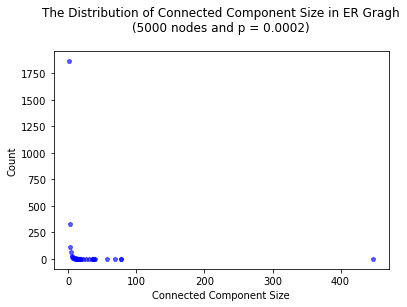

In [90]:
# observe the size of connected components in G_ER
cc_count = [len(c) for c in sorted(nx.connected_components(Gs['G_ER']), key=len, reverse=True)]
import collections
cc_counter = collections.Counter(cc_count)
cc, count = zip(*cc_counter.items())

# plot
width = 1.0
plt.scatter(cc,count,color = 'blue',marker= 'p',s = 20,alpha = 0.6)
plt.title("The Distribution of Connected Component Size in ER Gragh\n(5000 nodes and p = 0.0002)",pad = 20.0)
plt.ylabel("Count")
plt.xlabel("Connected Component Size")
plt.show()

**Answer:**
> What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.

**From the code above, we have generated a BA network without the preferential attachment(means that it randomly chooses a node to connect at each time without considering the degree), and a ER network with the same size(N = 5000) and same p(p = 0.0002).**

**The differences bewteen this two networks:**  
**1. The degree distribution**  
   - ER network contains nodes with 0 degree while BA network without the preferential attachment does not. This is due to the growth mechanism that we maintain in BA_without_pa network.   
   - The max degree in BA_without_pa network (around 14) is larger than that of ER network (around 6) (although both of them are much smaller than the max degree of BA network). That is because, although these two networks randomly select nodes, for BA_without_pa,the number of the nodes is small to begin with, which would increase the chance of being selected.

**2. The number of connected components**  
   - BA_without_pa has only one component because of its growth mechanism, while the ER network has more than 2000 components. As can be seen from the plot *The Distribution of Connected Component Size in ER Gragh*, most components  only have one node. This is because the ER network randomly generates links from nodes, which results in many nodes having no links at all.